In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.neural_network import MLPClassifier
import time
import seaborn as sns

from model import FFNN

In [2]:
def load_mnist():
    print("Loading MNIST dataset")
    X, y = fetch_openml('mnist_784', version=1, return_X_y=True, as_frame=False)
    
    X = X / 255
    
    y = y.astype(int)
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=69)
    
    y_train_onehot = np.zeros((y_train.shape[0], 10))
    y_train_onehot[np.arange(y_train.shape[0]), y_train] = 1
    
    y_test_onehot = np.zeros((y_test.shape[0], 10))
    y_test_onehot[np.arange(y_test.shape[0]), y_test] = 1
    
    print(f"Data loaded: X_train: {X_train.shape}, y_train: {y_train.shape}")
    
    return X_train, X_test, y_train, y_train_onehot, y_test, y_test_onehot

In [3]:
def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(title)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()
    plt.show()

In [4]:
def visualize_predictions(X_test, y_test, y_pred, n_samples=5):
    
    indices = np.random.choice(len(X_test), n_samples, replace=False)
    
    plt.figure(figsize=(15, 3))
    for i, idx in enumerate(indices):
        plt.subplot(1, n_samples, i+1)
        plt.imshow(X_test[idx].reshape(28, 28), cmap='gray')
        plt.title(f"True: {y_test[idx]}\nPred: {y_pred[idx]}")
        plt.axis('off')
    plt.tight_layout()
    plt.show()

In [5]:
X_train, X_test, y_train, y_train_onehot, y_test, y_test_onehot = load_mnist()

subset_pct = 0.1 # pct of data, set subset_pct = 1 to train with all the data 
subset_size = int(len(X_train) * subset_pct)
X_train_subset = X_train[:subset_size]
y_train_subset = y_train[:subset_size]
y_train_onehot_subset = y_train_onehot[:subset_size]

print(f"Using subset of data ({subset_pct * 100:.0f}% of data): {X_train_subset.shape}")

Loading MNIST dataset
Data loaded: X_train: (56000, 784), y_train: (56000,)
Using subset of data (10% of data): (5600, 784)


Training Custom FFNN
FFNN Model Layers:
Layer 0: Input Dim = 784, Output Dim = 128, Activation = ReLUActivation
  Bobot: (784, 128), Bias: (1, 128)
Layer 1: Input Dim = 128, Output Dim = 10, Activation = SoftmaxActivation
  Bobot: (128, 10), Bias: (1, 10)


Training:   0%|          | 0/20 [00:00<?, ?it/s]

Epoch 1/20:   0%|          | 0/175 [00:00<?, ?it/s]

Epoch 2/20:   0%|          | 0/175 [00:00<?, ?it/s]

Epoch 3/20:   0%|          | 0/175 [00:00<?, ?it/s]

Epoch 4/20:   0%|          | 0/175 [00:00<?, ?it/s]

Epoch 5/20:   0%|          | 0/175 [00:00<?, ?it/s]

Epoch 6/20:   0%|          | 0/175 [00:00<?, ?it/s]

Epoch 7/20:   0%|          | 0/175 [00:00<?, ?it/s]

Epoch 8/20:   0%|          | 0/175 [00:00<?, ?it/s]

Epoch 9/20:   0%|          | 0/175 [00:00<?, ?it/s]

Epoch 10/20:   0%|          | 0/175 [00:00<?, ?it/s]

Epoch 11/20:   0%|          | 0/175 [00:00<?, ?it/s]

Epoch 12/20:   0%|          | 0/175 [00:00<?, ?it/s]

Epoch 13/20:   0%|          | 0/175 [00:00<?, ?it/s]

Epoch 14/20:   0%|          | 0/175 [00:00<?, ?it/s]

Epoch 15/20:   0%|          | 0/175 [00:00<?, ?it/s]

Epoch 16/20:   0%|          | 0/175 [00:00<?, ?it/s]

Epoch 17/20:   0%|          | 0/175 [00:00<?, ?it/s]

Epoch 18/20:   0%|          | 0/175 [00:00<?, ?it/s]

Epoch 19/20:   0%|          | 0/175 [00:00<?, ?it/s]

Epoch 20/20:   0%|          | 0/175 [00:00<?, ?it/s]

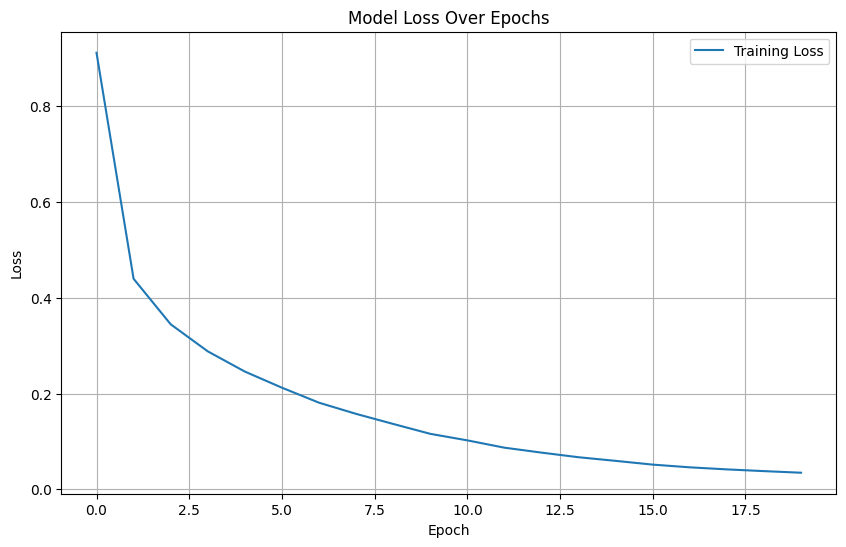

In [6]:
print("Training Custom FFNN")

# Input layer 28 x 28 = 784 inputs
# Output (softmax) = 10 outputs (0 - 9)
layers_config = [
    (784, None),            
    (128, "relu", {"rms_norm": True, "l1_lambda": 0.0, "l2_lambda": 0.0}),
    (10, "softmax")         
]

# Global l2 reg with lambda = 0.0001
custom_model = FFNN(
    layers_config=layers_config, 
    loss="categorical_crossentropy",
    weight_init_method="he",
    l2_lambda=0.0001
)

custom_model.summary()

# custom_model.visualize()

start_time = time.time()
custom_history = custom_model.train(
    X_train_subset, 
    y_train_onehot_subset,
    epochs=20,
    batch_size=32,
    learning_rate=0.01,
    verbose=1
)
custom_train_time = time.time() - start_time

custom_predictions = custom_model.forward(X_test)
custom_pred_classes = np.argmax(custom_predictions, axis=1)
custom_accuracy = accuracy_score(y_test, custom_pred_classes)

In [7]:
custom_model.visualize()

Visualize network using graph with weights and gradients info


In [8]:
print("Training sklearn MLPClassifier")
sklearn_model = MLPClassifier(
    hidden_layer_sizes=(128,),
    activation='relu',
    solver='adam',
    alpha=0.0001,
    batch_size=32,
    learning_rate='constant',
    learning_rate_init=0.01,
    max_iter=20,
    random_state=69,
    verbose=True
)

start_time = time.time()
sklearn_model.fit(X_train_subset, y_train_subset)
sklearn_train_time = time.time() - start_time

sklearn_pred_classes = sklearn_model.predict(X_test)
sklearn_accuracy = accuracy_score(y_test, sklearn_pred_classes)

Training sklearn MLPClassifier
Iteration 1, loss = 0.51144701
Iteration 2, loss = 0.22952466
Iteration 3, loss = 0.15129213
Iteration 4, loss = 0.11270706
Iteration 5, loss = 0.11324000
Iteration 6, loss = 0.07734166
Iteration 7, loss = 0.08163980
Iteration 8, loss = 0.04970430
Iteration 9, loss = 0.04309537
Iteration 10, loss = 0.06244568
Iteration 11, loss = 0.08750307
Iteration 12, loss = 0.09949295
Iteration 13, loss = 0.11564884
Iteration 14, loss = 0.06277626
Iteration 15, loss = 0.08033322
Iteration 16, loss = 0.06665043
Iteration 17, loss = 0.05407972
Iteration 18, loss = 0.04768902
Iteration 19, loss = 0.05310817
Iteration 20, loss = 0.04487492
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.


Results Comparison
Custom FFNN accuracy: 0.9285 (training time: 6.30s)
scikit-learn MLP accuracy: 0.9424 (training time: 4.54s)

Custom FFNN Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.97      0.96      1328
           1       0.97      0.96      0.97      1594
           2       0.94      0.90      0.92      1400
           3       0.92      0.90      0.91      1417
           4       0.91      0.94      0.93      1371
           5       0.93      0.89      0.91      1258
           6       0.93      0.96      0.95      1417
           7       0.93      0.94      0.93      1473
           8       0.87      0.92      0.90      1369
           9       0.91      0.89      0.90      1373

    accuracy                           0.93     14000
   macro avg       0.93      0.93      0.93     14000
weighted avg       0.93      0.93      0.93     14000


scikit-learn MLP Classification Report:
              precision    recall  f

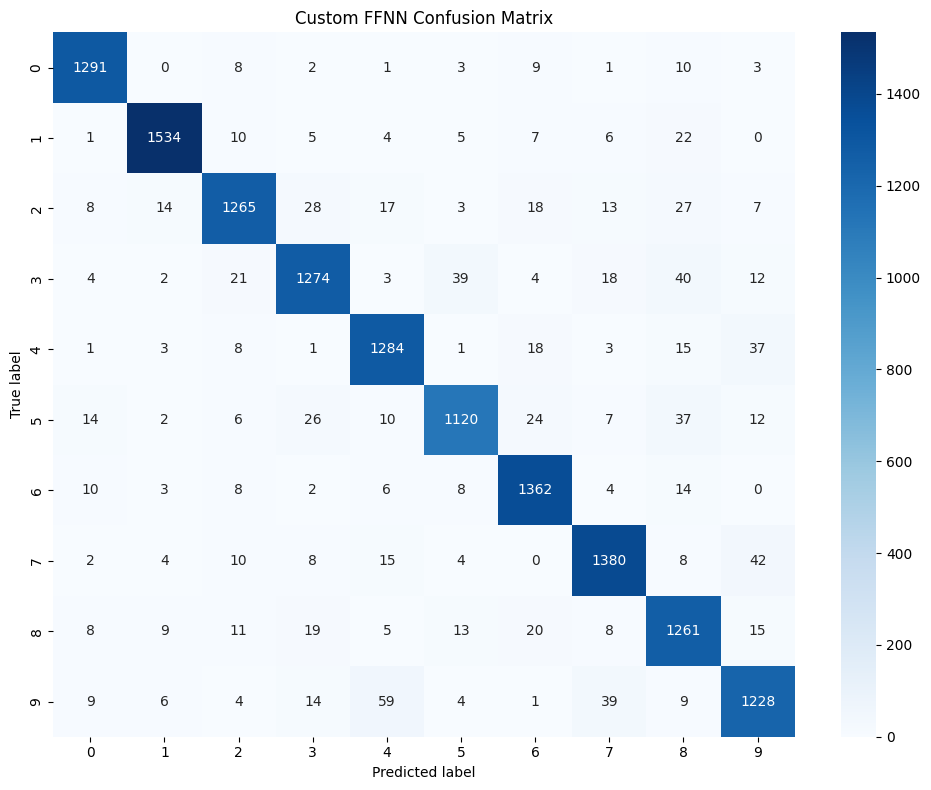

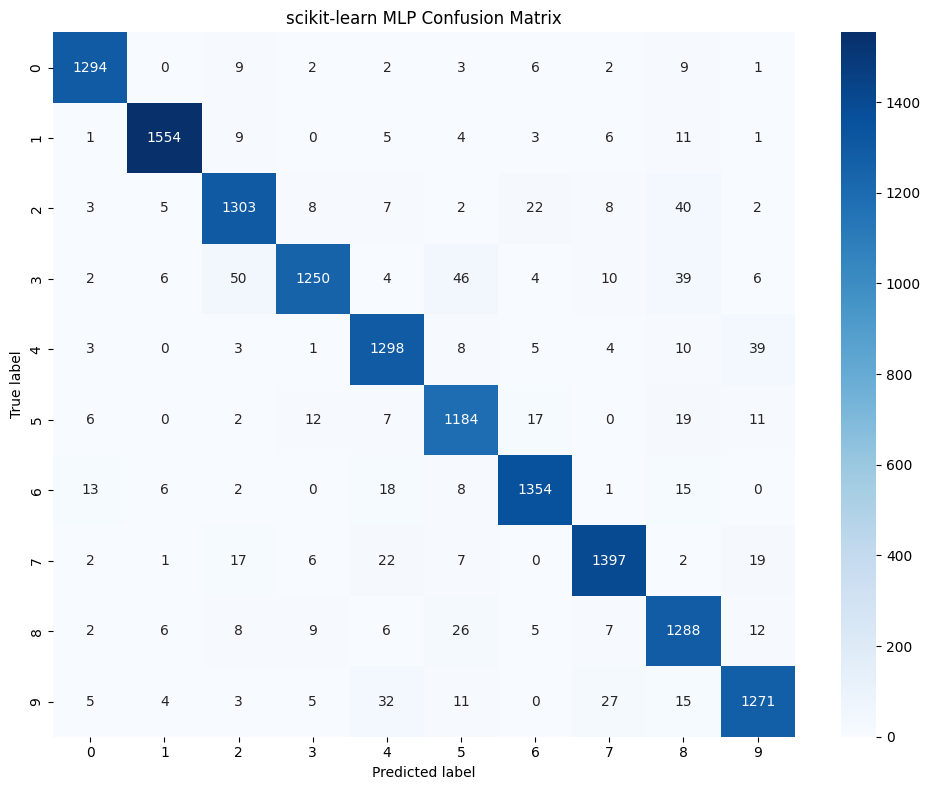


Custom FFNN Predictions:


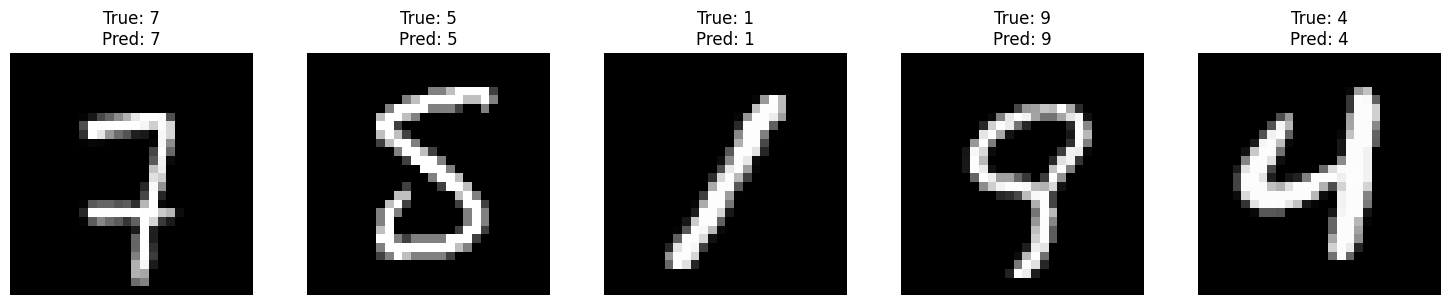


scikit-learn MLP Predictions:


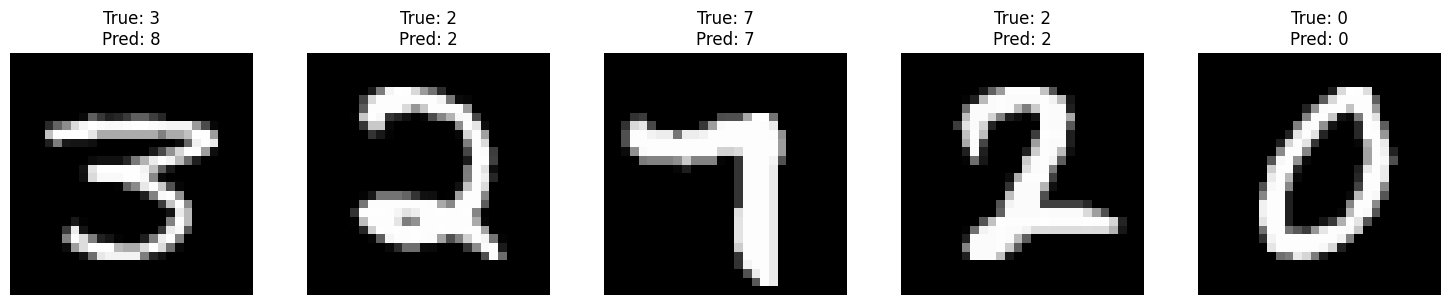

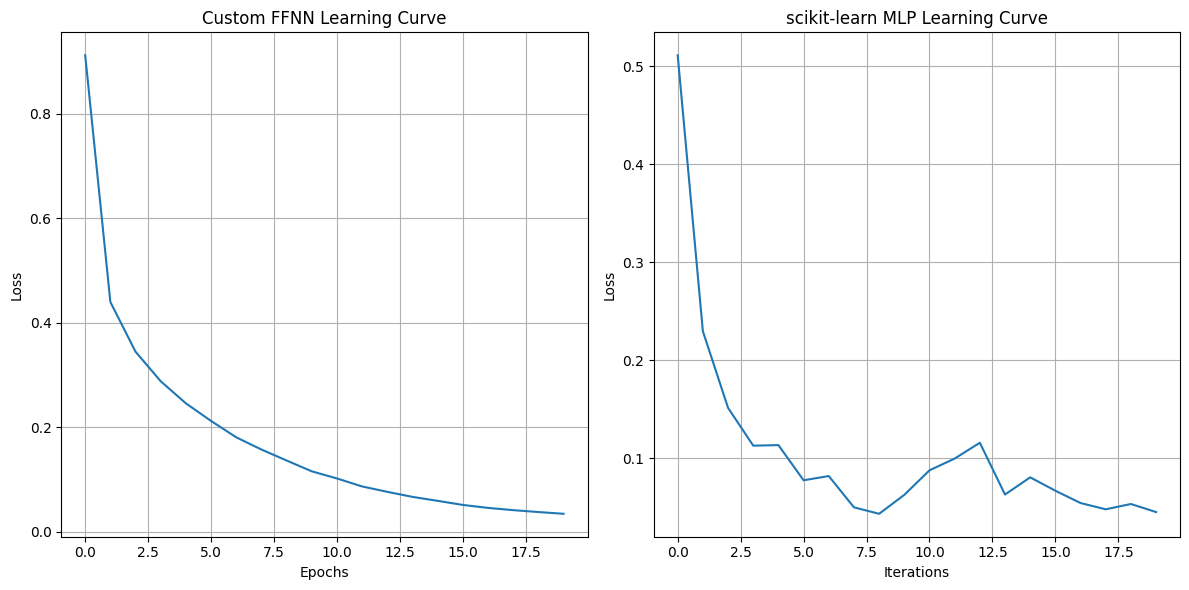

Gradient Distributions


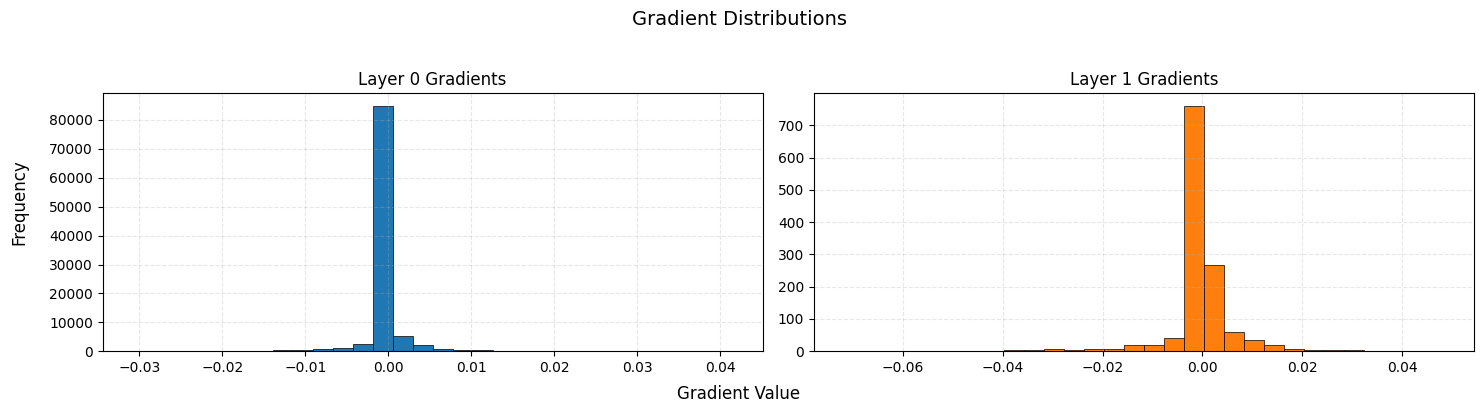

Weight Distributions


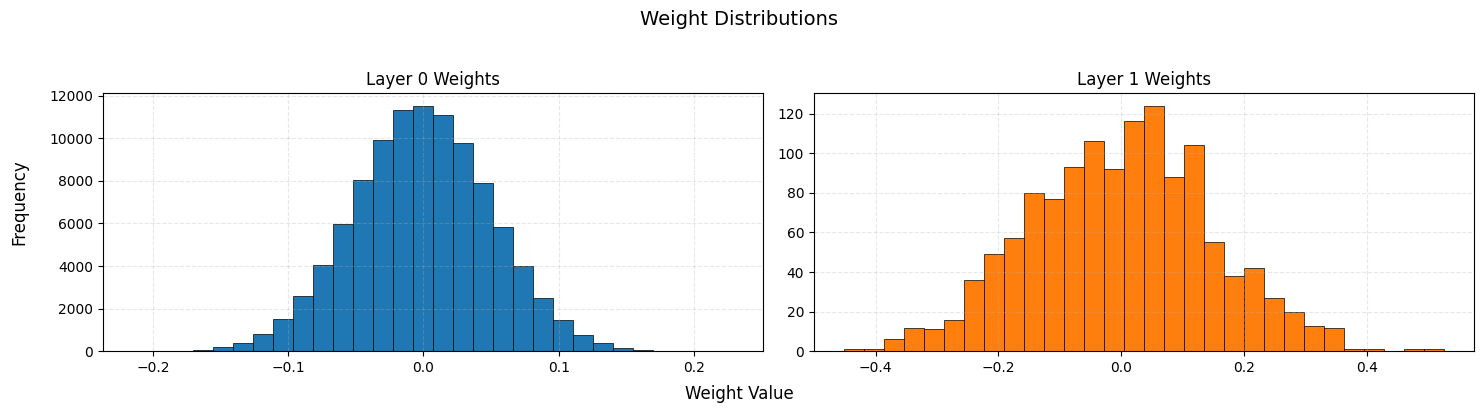

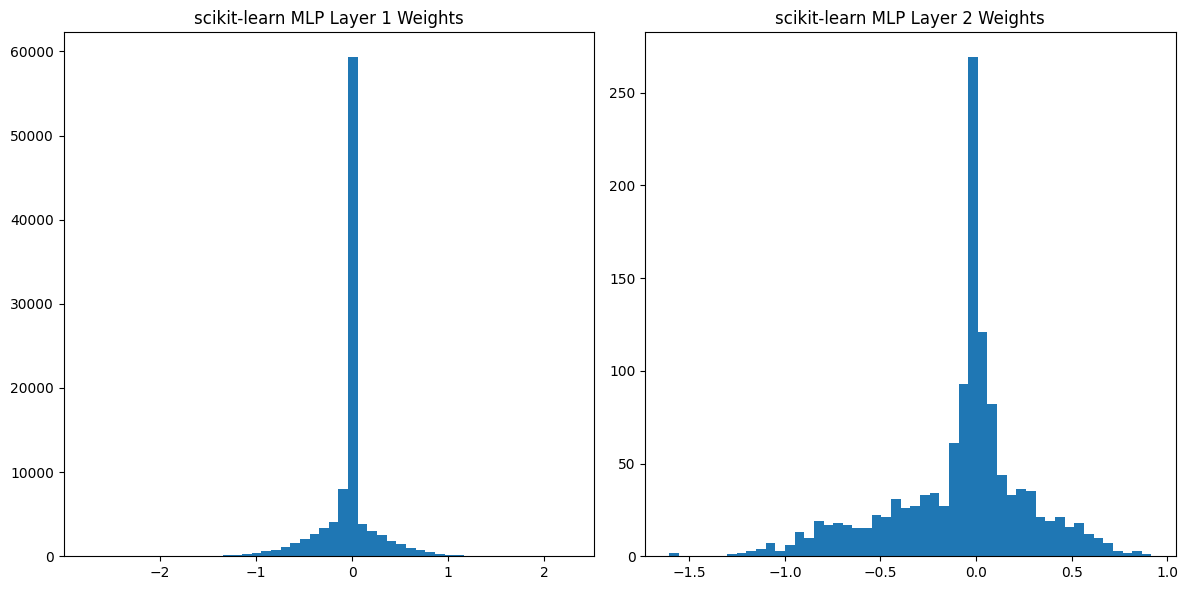

In [9]:
print("Results Comparison")
print(f"Custom FFNN accuracy: {custom_accuracy:.4f} (training time: {custom_train_time:.2f}s)")
print(f"scikit-learn MLP accuracy: {sklearn_accuracy:.4f} (training time: {sklearn_train_time:.2f}s)")

print("\nCustom FFNN Classification Report:")
print(classification_report(y_test, custom_pred_classes))

print("\nscikit-learn MLP Classification Report:")
print(classification_report(y_test, sklearn_pred_classes))

plot_confusion_matrix(y_test, custom_pred_classes, "Custom FFNN Confusion Matrix")
plot_confusion_matrix(y_test, sklearn_pred_classes, "scikit-learn MLP Confusion Matrix")

print("\nCustom FFNN Predictions:")
visualize_predictions(X_test, y_test, custom_pred_classes)

print("\nscikit-learn MLP Predictions:")
visualize_predictions(X_test, y_test, sklearn_pred_classes)

if hasattr(sklearn_model, 'loss_curve_'):
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.plot(custom_history['train_loss'], label='Custom FFNN')
    plt.title('Custom FFNN Learning Curve')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.grid(True)
    
    plt.subplot(1, 2, 2)
    plt.plot(sklearn_model.loss_curve_, label='scikit-learn MLP')
    plt.title('scikit-learn MLP Learning Curve')
    plt.xlabel('Iterations')
    plt.ylabel('Loss')
    plt.grid(True)
    
    plt.tight_layout()
    plt.show()

print("Gradient Distributions")
custom_model.plot_gradients_dist()

print("Weight Distributions")
custom_model.plot_weights_dist()

plt.figure(figsize=(12, 6))
for i, weights in enumerate(sklearn_model.coefs_):
    plt.subplot(1, len(sklearn_model.coefs_), i+1)
    plt.hist(weights.flatten(), bins=50)
    plt.title(f'scikit-learn MLP Layer {i+1} Weights')
plt.tight_layout()
plt.show()